# Class 06 Add 

## Review Assignment 4 

### Predicting Survival Rates for Lung Cancer Surgery Patients
> 1. Write a program to predict the life or death of a new patient using data from existing patients!  
>> * Actual medical record data ('data/lungcancer.csv') recording preoperative diagnosis data and postoperative survival results of lung cancer surgery patients published in 2013 by Medical University in Poland.
>> * The medical treatment file is in the table format, and the treatment information of a total of 470 patients is recorded.
>> <img src = './images/asg4.png' width=600 height=200>
>> * Each patient can be divided into rows, and the columns from A to Q are the degree of disease of each patient,
>> * The last R column is the final survival status of the patient. 0 is survival, 1 is death.
>2. Complete the following code
>3. Add a description to each line of code
>4. Save as a pdf file and upload on LMS and submit a hardcopy before the next class(1000am, 4/11/2023)

In [ ]:
# Predicting Survival Rates for Lung Cancer Surgery Patients
# 
from keras.models import Sequential
from keras.layers import Dense

# 
import numpy
import tensorflow as tf

# 
seed = 
numpy.random.seed(seed)
tf.random.set_seed(seed) 

# 
Data_set = __________("_____lungcancer.csv", delimiter=_____)

# 
X = Data_set[______________]
Y = Data_set[______________]

# 
model = Sequential()
model.add(Dense(30, input_dim=___, activation=________))
model.add(Dense(1, activation=___________))

# 
model.compile(loss=____________, optimizer=_______, metrics=['accuracy'])
model.fit(X, Y, epochs=_____, batch_size=______)

# 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


# -*- coding: utf-8 -*-
# This is the part that allows you to use Hangul inside the code.

# Load the keras function needed to drive deep learning.
from keras.models import Sequential
from keras.layers import Dense

# Load the required libraries.
import numpy
import tensorflow as tf

# This is the part that you set to output the same result every time you run it.
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed) # old : tf.set_random_seed(seed)

# Load Data
Data_set = numpy.loadtxt("../data/lungcancer.csv", delimiter=",")

# Store patient records and surgical results, separated by X and Y.
X = Data_set[:,0:17]
Y = Data_set[:,17]

# Determine the deep learning structure (this is where the model is set up and executed).
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Run deep learning.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10)

# Outputs the results (Accuracy)
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

### Data Set Information:   https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007â€“2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

### Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

In [163]:
# -*- coding: utf-8 -*-
# This is the part that allows you to use Hangul inside the code.

# Load the keras function needed to drive deep learning.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
# Load the required libraries.
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


# This is the part that you set to output the same result every time you run it.
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed) # old : tf.set_random_seed(seed)

In [164]:
# Load Data
df = pd.read_csv('./data/lungcancer.csv')

In [167]:
df.head(10)

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0
5,35,2,2.76,2.20,1,0,0,0,1,0,11,0,0,0,0,0,76,0
6,42,2,3.24,2.52,1,0,0,0,1,0,12,0,0,0,1,0,63,1
7,65,2,3.15,2.76,1,0,1,0,1,0,12,0,0,0,1,0,59,0
8,111,2,4.48,4.20,0,0,0,0,0,0,12,0,0,0,1,0,55,0
9,121,2,3.84,2.56,1,0,0,0,1,0,11,0,0,0,0,0,59,0


In [168]:
# Store patient records and surgical results, separated by X and Y.
X = df.iloc[:,0:17]
Y = df.iloc[:,17]

In [171]:
X

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76
465,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77
466,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62
467,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58


In [172]:
Y.shape

(469,)

In [173]:
# Build the model (Determine the deep learning structure)
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=50, batch_size=20)

# Evaluate the model
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 13.1021 - accuracy: 0.2141
Epoch 2/50
24/24 [==============================] - 0s 913us/step - loss: 1.6238 - accuracy: 0.8435
Epoch 3/50
24/24 [==============================] - 0s 912us/step - loss: 0.7174 - accuracy: 0.8293
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.8403
Epoch 5/50
24/24 [==============================] - 0s 861us/step - loss: 0.5695 - accuracy: 0.8089
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8631
Epoch 7/50
24/24 [==============================] - 0s 954us/step - loss: 0.4176 - accuracy: 0.8746
Epoch 8/50
24/24 [==============================] - 0s 951us/step - loss: 0.4628 - accuracy: 0.8538
Epoch 9/50
24/24 [==============================] - 0s 954us/step - loss: 0.4918 - accuracy: 0.8347
Epoch 10/50
24/24 [==============================] - 0s 984us/step - loss: 0.4568 - accuracy: 0.8345
Epoc

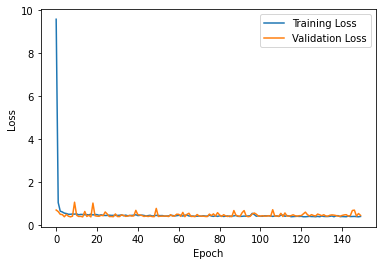

In [174]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

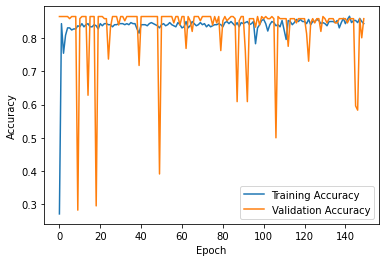

In [175]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

During the training process of a deep learning model, the model is updated based on the gradients computed from the loss function with respect to the model parameters using the training data. The purpose of the training process is to make the model learn the patterns and features of the training data so that it can generalize well to new data. However, if the model only learns the training data too well, it may not be able to perform well on new, unseen data, a phenomenon called overfitting.

To prevent overfitting, we use a validation set to evaluate the model's performance on data it has not seen during training. The validation set is a portion of the original dataset that is held out and not used in the training process. Instead, it is used to evaluate the model's performance after each epoch of training.

In the context of the output "15/15", this means that the model has evaluated its performance on all 15 batches of the validation data after the training for that epoch. This allows us to monitor the model's performance on new data and detect if it is overfitting or not. If the validation accuracy is much lower than the training accuracy, it may indicate that the model is overfitting and we need to take some measures such as early stopping, regularization, or changing the model architecture to prevent overfitting.

In [176]:
from sklearn.model_selection import train_test_split
Data_set2 = numpy.loadtxt("./data/lungcancer.csv", delimiter=",")
X2 = Data_set2[:,0:17]
Y2 = Data_set2[:,17]
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [177]:
# Build the model (Determine the deep learning structure)
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
# Train the model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
# history = model2.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)
history = model2.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2, callbacks=[early_stop])


# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
15/15 [==============================] - 0s 11ms/step - loss: 11.0137 - accuracy: 0.6195 - val_loss: 2.4502 - val_accuracy: 0.8816
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 7.0263 - accuracy: 0.7283 - val_loss: 3.5683 - val_accuracy: 0.8816
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 6.6287 - accuracy: 0.7359 - val_loss: 3.6468 - val_accuracy: 0.8947
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 7.5526 - accuracy: 0.7358 - val_loss: 2.7874 - val_accuracy: 0.9079
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 6.4772 - accuracy: 0.7058 - val_loss: 2.3311 - val_accuracy: 0.9079
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 5.0211 - accuracy: 0.7244 - val_loss: 1.9656 - val_accuracy: 0.9079
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 3.8962 - accuracy: 0.7354 - val_loss: 1.6808 - val_accuracy: 0.9079
Epoch 8/50
15/15 [

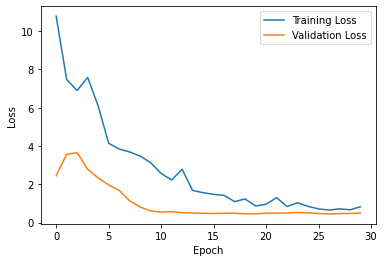

In [179]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [180]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=17, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


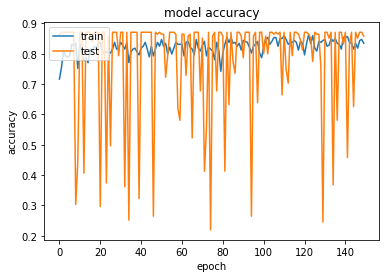

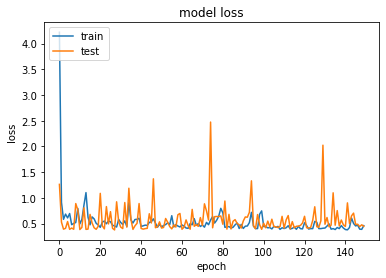

In [181]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### K-fold cross validation  
### Log Loss  
### Batch, Iteration, Epoch  

### Final Project